In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Salary Prediction of Data Professions.csv')
print(df.head())


  FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE DESIGNATION   AGE  \
0     TOMASA       ARMEN   F   5-18-2014   01-07-2016     Analyst  21.0   
1      ANNIE         NaN   F         NaN   01-07-2016   Associate   NaN   
2      OLIVE        ANCY   F   7-28-2014   01-07-2016     Analyst  21.0   
3     CHERRY     AQUILAR   F  04-03-2013   01-07-2016     Analyst  22.0   
4       LEON  ABOULAHOUD   M  11-20-2014   01-07-2016     Analyst   NaN   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance         24.0               6.0      2.0         0  
1   89207         Web          NaN              13.0      NaN         7  
2   40955     Finance         23.0               7.0      3.0         0  
3   45550          IT         22.0               8.0      3.0         0  
4   43161  Operations         27.0               3.0      NaN         3  


In [ ]:
#Exploratory Data Analysis (EDA):

In [5]:
df.keys()

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

In [9]:
df.head(50)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
5,VICTORIA,NaN,F,2-19-2013,01-07-2016,Analyst,22.0,48736,Marketing,20.0,10.0,4.0,0
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
7,JACQUES,AKMAL,M,12-05-2013,01-07-2016,Analyst,NaN,40058,Marketing,29.0,1.0,2.0,2
8,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1
9,LILIAN,APELA,F,11-11-2014,01-07-2016,Analyst,22.0,43110,Finance,15.0,15.0,3.0,0


In [34]:
df.tail(70)

,FIRST NAME,LAST NAME,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YEARS_AT_COMPANY
2569,PEARLIE,ANTONE,F,Analyst,25.0,49734,Management,18.0,12.0,3.0,3,1.437372
2570,OLA,ANGELONE,F,Senior Analyst,27.0,51277,Operations,24.0,6.0,5.0,2,2.737851
2571,DAMIAN,AGRESTE,M,Analyst,24.0,40065,IT,24.0,6.0,2.0,1,2.179329
2572,EDWINA,ANZAI,F,Analyst,24.0,40707,Web,21.0,9.0,4.0,1,2.420260
2573,ART,AIU,M,Analyst,23.0,49913,Operations,27.0,3.0,3.0,0,1.735797
...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10,4.528405
2635,LOUISE,ALTARAS,F,Analyst,23.0,45758,IT,17.0,13.0,2.0,0,1.979466
2636,RENEE,ALVINO,F,Analyst,21.0,47315,Web,29.0,1.0,5.0,0,1.954825
2637,TERI,ANASTASIO,F,Analyst,24.0,45172,Web,23.0,7.0,3.0,1,1.809719


In [11]:
# Summary statistics
print(df.describe())

               AGE         SALARY  LEAVES USED  LEAVES REMAINING      RATINGS  \
count  2636.000000    2639.000000  2636.000000       2637.000000  2637.000000   
mean     24.756449   58136.678287    22.501517          7.503223     3.486159   
std       3.908228   36876.956944     4.604469          4.603193     1.114933   
min      21.000000   40001.000000    15.000000          0.000000     2.000000   
25%      22.000000   43418.000000    19.000000          4.000000     2.000000   
50%      24.000000   46781.000000    22.000000          8.000000     3.000000   
75%      25.000000   51401.500000    26.000000         11.000000     4.000000   
max      45.000000  388112.000000    30.000000         15.000000     5.000000   

          PAST EXP  
count  2639.000000  
mean      1.566881  
std       2.728416  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max      23.000000  


In [12]:
# Check for missing values
print(df.isnull().sum())

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64


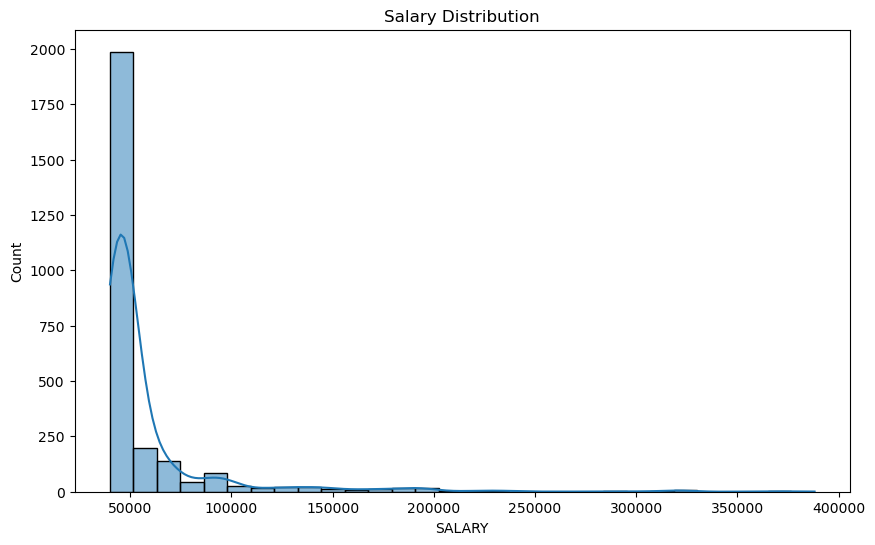

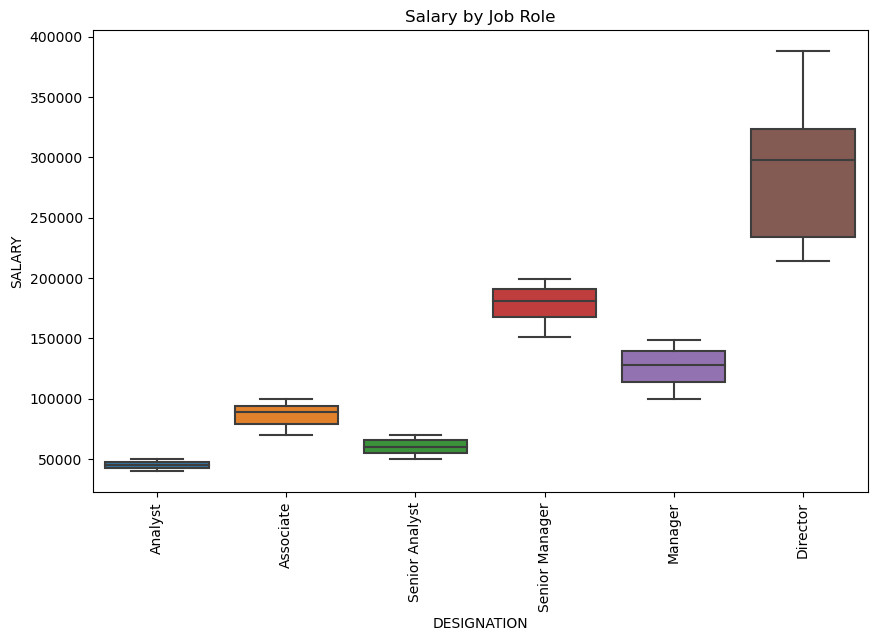

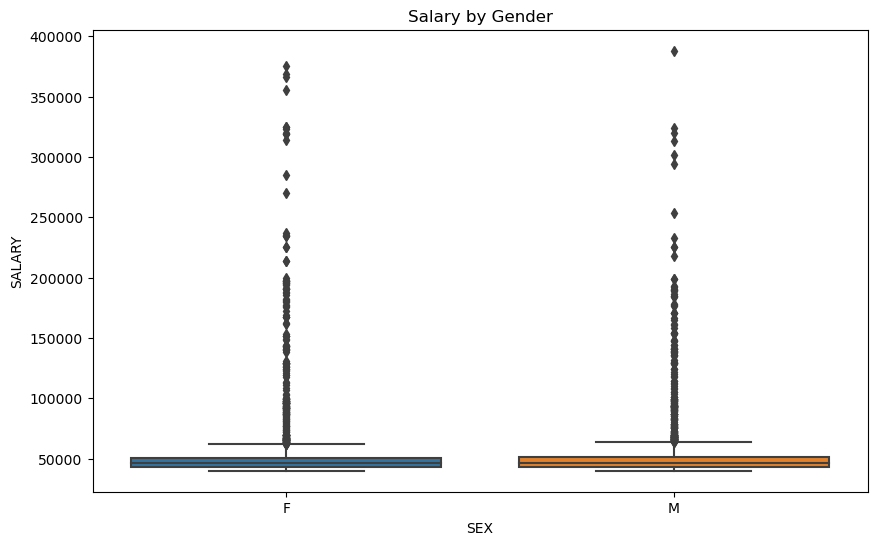

In [13]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['SALARY'], kde=True, bins=30)
plt.title('Salary Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='DESIGNATION', y='SALARY', data=df)
plt.title('Salary by Job Role')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='SALARY', data=df)
plt.title('Salary by Gender')
plt.show()

In [14]:
# Convert 'DOJ' and 'CURRENT DATE' to datetime
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

In [15]:
# Create a new feature 'YEARS_AT_COMPANY'
df['YEARS_AT_COMPANY'] = (df['CURRENT DATE'] - df['DOJ']).dt.days / 365.25

In [16]:
# Drop original date columns
df = df.drop(['DOJ', 'CURRENT DATE'], axis=1)

In [17]:
print(df)

     FIRST NAME   LAST NAME SEX     DESIGNATION   AGE  SALARY        UNIT  \
0        TOMASA       ARMEN   F         Analyst  21.0   44570     Finance   
1         ANNIE         NaN   F       Associate   NaN   89207         Web   
2         OLIVE        ANCY   F         Analyst  21.0   40955     Finance   
3        CHERRY     AQUILAR   F         Analyst  22.0   45550          IT   
4          LEON  ABOULAHOUD   M         Analyst   NaN   43161  Operations   
...         ...         ...  ..             ...   ...     ...         ...   
2634  KATHERINE      ALSDON   F  Senior Manager  36.0  185977  Management   
2635     LOUISE     ALTARAS   F         Analyst  23.0   45758          IT   
2636      RENEE      ALVINO   F         Analyst  21.0   47315         Web   
2637       TERI   ANASTASIO   F         Analyst  24.0   45172         Web   
2638    GREGORY      ABARCA   M         Analyst  24.0   49176   Marketing   

      LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  YEARS_AT_COMPANY  


In [18]:
# Define feature and target variables
X = df.drop(['FIRST NAME', 'LAST NAME', 'SALARY'], axis=1)
y = df['SALARY']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.shape

(2111, 9)

In [38]:
X_test.shape

(528, 9)

In [39]:
X_train.columns

Index(['SEX', 'DESIGNATION', 'AGE', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING',
       'RATINGS', 'PAST EXP', 'YEARS_AT_COMPANY'],
      dtype='object')

In [20]:
# Define preprocessing steps for numerical and categorical features
numerical_features = ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'YEARS_AT_COMPANY']
categorical_features = ['SEX', 'DESIGNATION', 'UNIT']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [21]:
print(categorical_transformer)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [22]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [23]:
# Create and evaluate the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [24]:
# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AGE', 'LEAVES USED',
                                                   'LEAVES REMAINING',
                                                   'RATINGS', 'PAST EXP',
                                                   'YEARS_AT_COMPANY']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SEX', 'DESIGNATION',
                                                   'UNIT'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [25]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [26]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 4524.147275883838
Mean Squared Error: 113564687.1391536
Root Mean Squared Error: 10656.673361755704
R-squared: 0.931609659428883


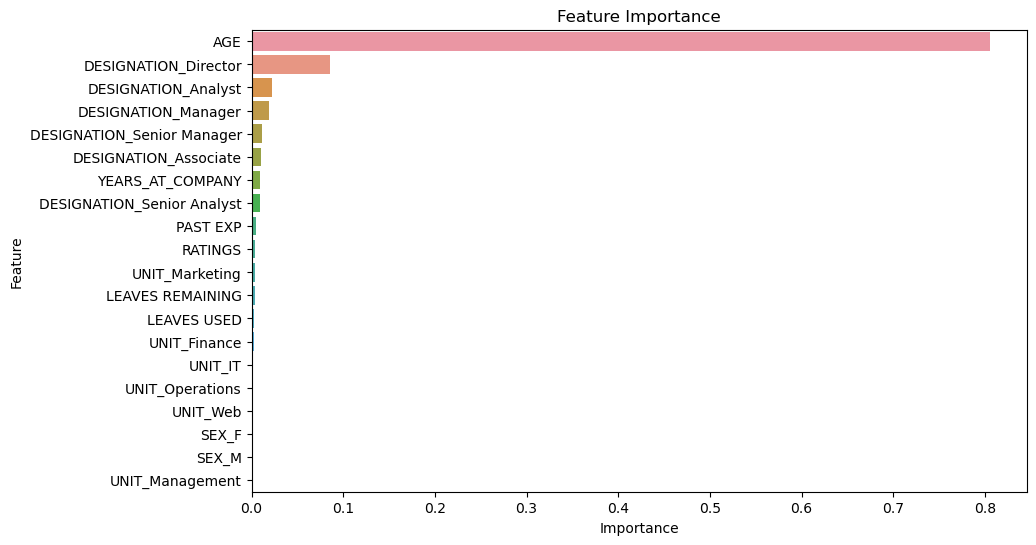

In [27]:
# Analyze feature importance
feature_importances = pipeline.named_steps['model'].feature_importances_
features = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.show()

In [28]:
# Recommendations based on findings
print("Recommendations:")
print("1. Focus on job roles that have higher salaries.")
print("2. Consider the impact of experience and ratings on salary.")
print("3. Identify departments with higher average salaries and explore opportunities there.")

Recommendations:
1. Focus on job roles that have higher salaries.
2. Consider the impact of experience and ratings on salary.
3. Identify departments with higher average salaries and explore opportunities there.


In [29]:
# Save the trained model using joblib
import joblib
joblib.dump(pipeline, 'salary_predictor.pkl')

['salary_predictor.pkl']

In [30]:
# Flask app for model deployment
from flask import Flask, request, jsonify

app = Flask(__name__)


In [31]:
# Load the trained model
model = joblib.load('salary_predictor.pkl')

In [32]:
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict(pd.DataFrame(data))
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(port=5000, debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [40]:
# Define the model
model = LinearRegression()

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 4632.281233393116
Mean Squared Error: 96411167.44356987
Root Mean Squared Error: 9818.918853090185
R-squared: 0.9419397636498972


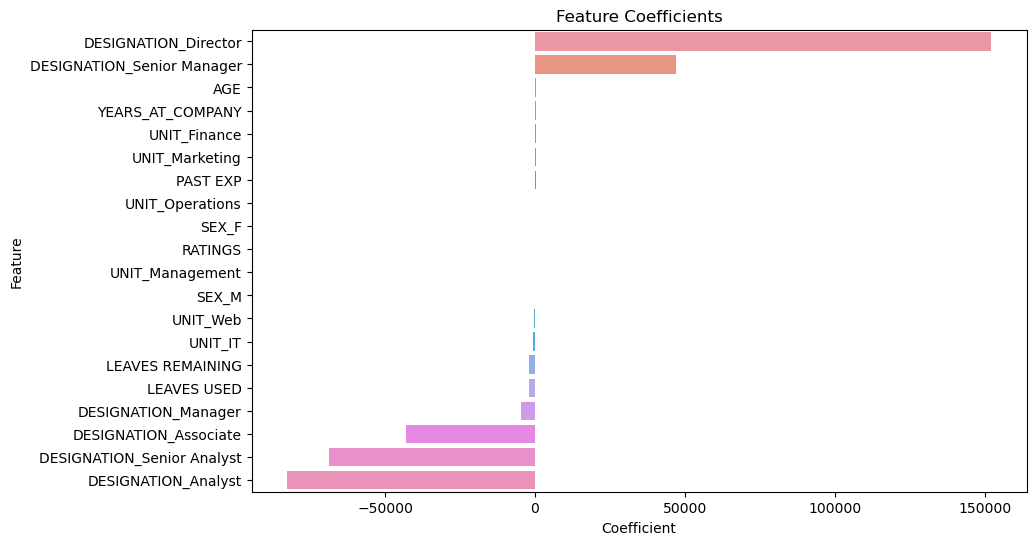

In [41]:
# Analyze feature coefficients
coefficients = pipeline.named_steps['model'].coef_
features = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df)
plt.title('Feature Coefficients')
plt.show()


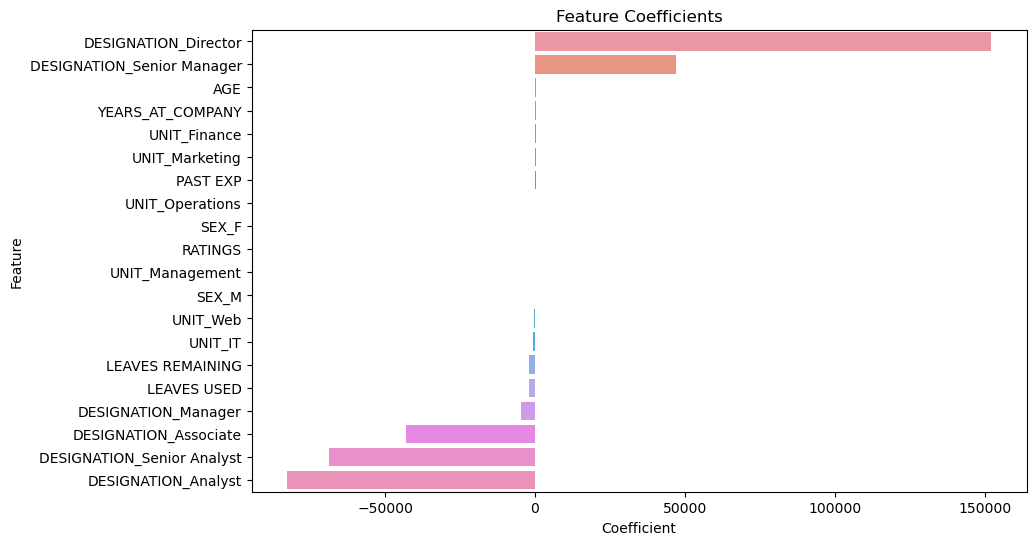

Recommendations:
1. Focus on job roles that have higher coefficients, indicating a stronger positive impact on salary.
2. Consider the impact of experience and ratings on salary.
3. Identify departments with higher average salaries and explore opportunities there.


In [42]:
# Analyze feature coefficients
coefficients = pipeline.named_steps['model'].coef_
features = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df)
plt.title('Feature Coefficients')
plt.show()

# Recommendations based on findings
print("Recommendations:")
print("1. Focus on job roles that have higher coefficients, indicating a stronger positive impact on salary.")
print("2. Consider the impact of experience and ratings on salary.")
print("3. Identify departments with higher average salaries and explore opportunities there.")
